# AI PROJECT 2023/2024

by Gianni Wu ,275641

## Problem Statement

In this project we aim to understand the satisfaction of the customers of a train company without the need of a direct evaluation. To accomplish this task, we will study the provided dataset, “trains_dataset.csv”.

The dataset contains many customer ratings and we hope to predict whether they are satisfied or not, as such this assignment is a regression problem. As such for this assignment we will use linear regression, ridge regression and lasso regression. To do this we shall follow the OSEMN method.

Understanding the customers' satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.

### IMPORT LIBRARIES

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification


In [338]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

def performance(y_test,pred):
    print(confusion_matrix(y_test, pred))
    print("Accuracy =", accuracy_score(y_test,pred))
    print("Precision =", precision_score(y_test,pred))
    print("Recall =", recall_score(y_test,pred))
    print("F1 Score =", f1_score(y_test,pred))
    print("AUC Score:",roc_auc_score(y_test,pred))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Log')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Logistic Regression ROC curve')
    plt.show()

def comparison(*list):
    dic={"Parameters":["Accuracy","Precision","Recall","F1_Score","AUC_Score"]}
    for j,i in list:
        l=[]
        Accuracy = accuracy_score(y_test,i)
        Precision = precision_score(y_test,i)
        Recall = recall_score(y_test,i)
        F1_Score = f1_score(y_test,i)
        AUC_Score = roc_auc_score(y_test,i)
        l.append(Accuracy)
        l.append(Precision)
        l.append(Recall)
        l.append(F1_Score)
        l.append(AUC_Score)
        dic[j]=l

    d=pd.DataFrame(dic)

    print(d)

    d.set_index('Parameters').plot(kind='barh', figsize=(10, 6))
    plt.title('Comparison of Parameters')
    plt.xlabel('Score')
    plt.ylabel('Parameters')
    plt.legend(title='Prediction Sets')
    plt.show()




---
### OSEMN - 1.

We download the provided dataset.

In [339]:
# Download the Data-set

data_set = pd.read_csv("trains (1).csv")

# Look at some Instances

data_set.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


The dataset has the following features:

• *Satisfied* : whether the customer is satisfied.
• *Onboard General Rating* : rating from 0 to 5 about the service on board.
• *Work or Leisure* : was the travelling for work or leisure.
• *Baggage Handling Rating* : rating from 0 to 5 about the handling of the baggage.
• *Age* : the age of the customer.
• *Cleanliness Rating* : rating from 0 to 5 about the cleanliness of the train.
• *Ticket Class* : the class of the ticket.
• *Loyalty* : is part of a loyalty program?
• *Food'n'Drink Rating* : rating from 0 to 5 about the food and bevarages on board.
• *Gender* : whether male or female.
• *Online Booking Rating* : rating from 0 to 5 about the online booking experience.
• *Ticket ID* : unique ID assigned to the travel ticket.
• *Onboard Service Rating* : rating from 0 to 5 about the service onboard.
• *Legroom Service Rating* : rating from 0 to 5 about the space for the legs.
• *Arrival Delay in Minutes* : the delay on the arrival of the train.
• *Departure Delay in Minutes* : the delay on the departure of the train.
• *Checkin Rating* : rating from 0 to 5 about the checkin experience.
• *Onboard Entertainment Rating* : rating from 0 to 5 about the onboard entertainment
experience.
• *Distance* : the distance of the specific travel.
• *Boarding Rating* : rating from 0 to 5 about the boarding.
• *Onboard WiFi Rating* : rating from 0 to 5 about the WiFi service.
• *Date and Time* : of the travel.
• *Seat Comfort Rating* : rating from 0 to 5 about the comfort of the seating.
• *Track Location Rating* : rating from 0 to 5 about the track where the train has been boarded.
• *Departure Arrival Time Rating* : rating from 0 to 5 about the timing of the travel.

In total there are 25 features, of which 14 are ratings from 1 to 5. The non-rating values are Satisfied, Work or Leisure, Age, Ticket Class, Loyalty, Gender, Ticket ID, Arrival Delay in Minutes , Departure Delay in Minutes, Distance and Date and Time.


---
### OSEMN - 2. Scrub

We check for missing values or outliers, data types or duplicates to ensure the quality and reliability of our dataset.

Ticket ID is a unique identifier, so we can use it as index. Due to the nature of the function if there were duplicates an error message will appear. Otherwise, every instance is a unique instance.

In [340]:
# Set Ticket ID as Index

data_set.set_index("Ticket ID")

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
Ticket ID,,,,,,,,,,,,,,,,,,,,,
4718594,3,5,5,13,4,3,4,1,4,18.0,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1048580,5,4,1,25,2,3,1,3,3,6.0,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
3670024,3,4,5,26,2,2,4,2,4,0.0,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3145737,5,4,2,25,5,2,1,5,3,9.0,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
5767177,4,3,4,61,3,3,3,3,4,0.0,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835000,2,5,4,34,3,3,4,1,4,0.0,...,3,N,4,2016-02-16 05:41,526,4,work,0,3,4
7602169,5,5,4,23,4,4,5,4,5,0.0,...,4,Y,4,2016-03-01 02:21,646,4,work,0,4,4
3407867,3,4,2,17,5,2,5,5,4,0.0,...,1,N,2,2016-02-20 00:13,828,2,leisure,0,4,2


In [341]:
data_set.describe()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,1.298800e+05,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,39.427957,3.057599,2.728696,5.494025e+06,3.306267,2.976925,3.632114,15.091129,3.252633,2.756876,3.358077,1190.316392,3.441361,14.713713,3.383023,3.286326
std,1.316252,1.176669,1.329933,15.119360,1.526741,1.329340,2.596965e+06,1.266185,1.278520,1.180025,38.465650,1.350719,1.401740,1.334049,997.452477,1.319289,38.071126,1.287099,1.313682
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000025e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.239218e+06,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,5.495646e+06,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,7.739715e+06,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,9.999975e+06,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

From this we can see that we have 19 numerical values and 6 categorical values. The categorical values being Satisfied, Loyalty, Gender, Work or Leisure, Ticket Class and Date and Time.

Unfortunately the regressions models we want to use need numerical input, as such we need to hot-encode them into integers.

In [342]:
# Extrapolate Categorical Columns

categorical_columns = ["Satisfied","Loyalty", "Gender", "Work or Leisure","Ticket Class"]

# Select independent variables
X_categorical = data_set[categorical_columns]

# Initialize ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply the Encoder
X_encoded = preprocessor.fit_transform(X_categorical)

# Convert the result back to a DataFrame with appropriate column names
columns_encoded = preprocessor.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=columns_encoded)

# Convert the encoded columns to integers
X_encoded_df = X_encoded_df.astype(int)

# Concatenate the encoded DataFrame with the original DataFrame
data_set_encoded = pd.concat([data_set, X_encoded_df], axis=1)

# Drop the original categorical columns if needed
data_set_encoded.drop(columns=categorical_columns, inplace=True)

# Display the resulting DataFrame
print(data_set_encoded.head())

print(data_set_encoded.columns)

   Legroom Service Rating  Onboard General Rating  Food'n'Drink Rating  Age  \
0                       3                       5                    5   13   
1                       5                       4                    1   25   
2                       3                       4                    5   26   
3                       5                       4                    2   25   
4                       4                       3                    4   61   

   Departure Arrival Time Rating  Onboard WiFi Rating  Ticket ID  \
0                              4                    3    4718594   
1                              2                    3    1048580   
2                              2                    2    3670024   
3                              5                    2    3145737   
4                              3                    3    5767177   

   Checkin Rating  Track Location Rating  Baggage Handling Rating  ...  \
0               4                      1  

Now that our dataset has been encoded we can proceed to look at missing values.

In [343]:
#Check for missing values

missing_values_table(data_set_encoded)

Your selected dataframe has 26 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,393,0.3


Only one feature has any missing values and the percentage is really small (0.3%), as such I didn't deem imputation necessary and we simply deleted the missing values.

In [344]:
# Drop Rows with Missing Values

data_set = data_set_encoded.dropna(subset=['Arrival Delay in Minutes'])


We convert Date and Time to a datetime type.

In [345]:
# Convert Date and Time to a Datetime type
data_set['Date and Time'] = pd.to_datetime(data_set['Date and Time'])


C:\Users\admin\AppData\Local\Temp\ipykernel_8956\2987397222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Date and Time'] = pd.to_datetime(data_set['Date and Time'])


---

### OSEMN - 3. Explore

#### CATEGORICAL VARIABLES

We have different types of graphs so I used different types of graphs to show their relationship with our dependent variable.

For our ratings and categorical values, since they have finite choices of classes, I chose to use Countplot to plot them.

In [346]:
# Separate the variables by their type.

# Categorical

data_set_cat = data_set[['Legroom Service Rating', 'Onboard General Rating',
       "Food'n'Drink Rating", 'Departure Arrival Time Rating',
       'Onboard WiFi Rating', 'Checkin Rating',
       'Track Location Rating', 'Baggage Handling Rating',
        'Boarding Rating', 'Online Booking Rating',
       'Satisfied_Y', 'Onboard Entertainment Rating',
        'Seat Comfort Rating',
       'Onboard Service Rating', 'Cleanliness Rating', 'Ticket Class_Premium','Ticket Class_Smart','Loyalty_Loyal', 'Gender_M',
       'Work or Leisure_work']]

# Continuous
data_set_con=data_set[["Age","Arrival Delay in Minutes","Distance","Departure Delay in Minutes"]]

C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

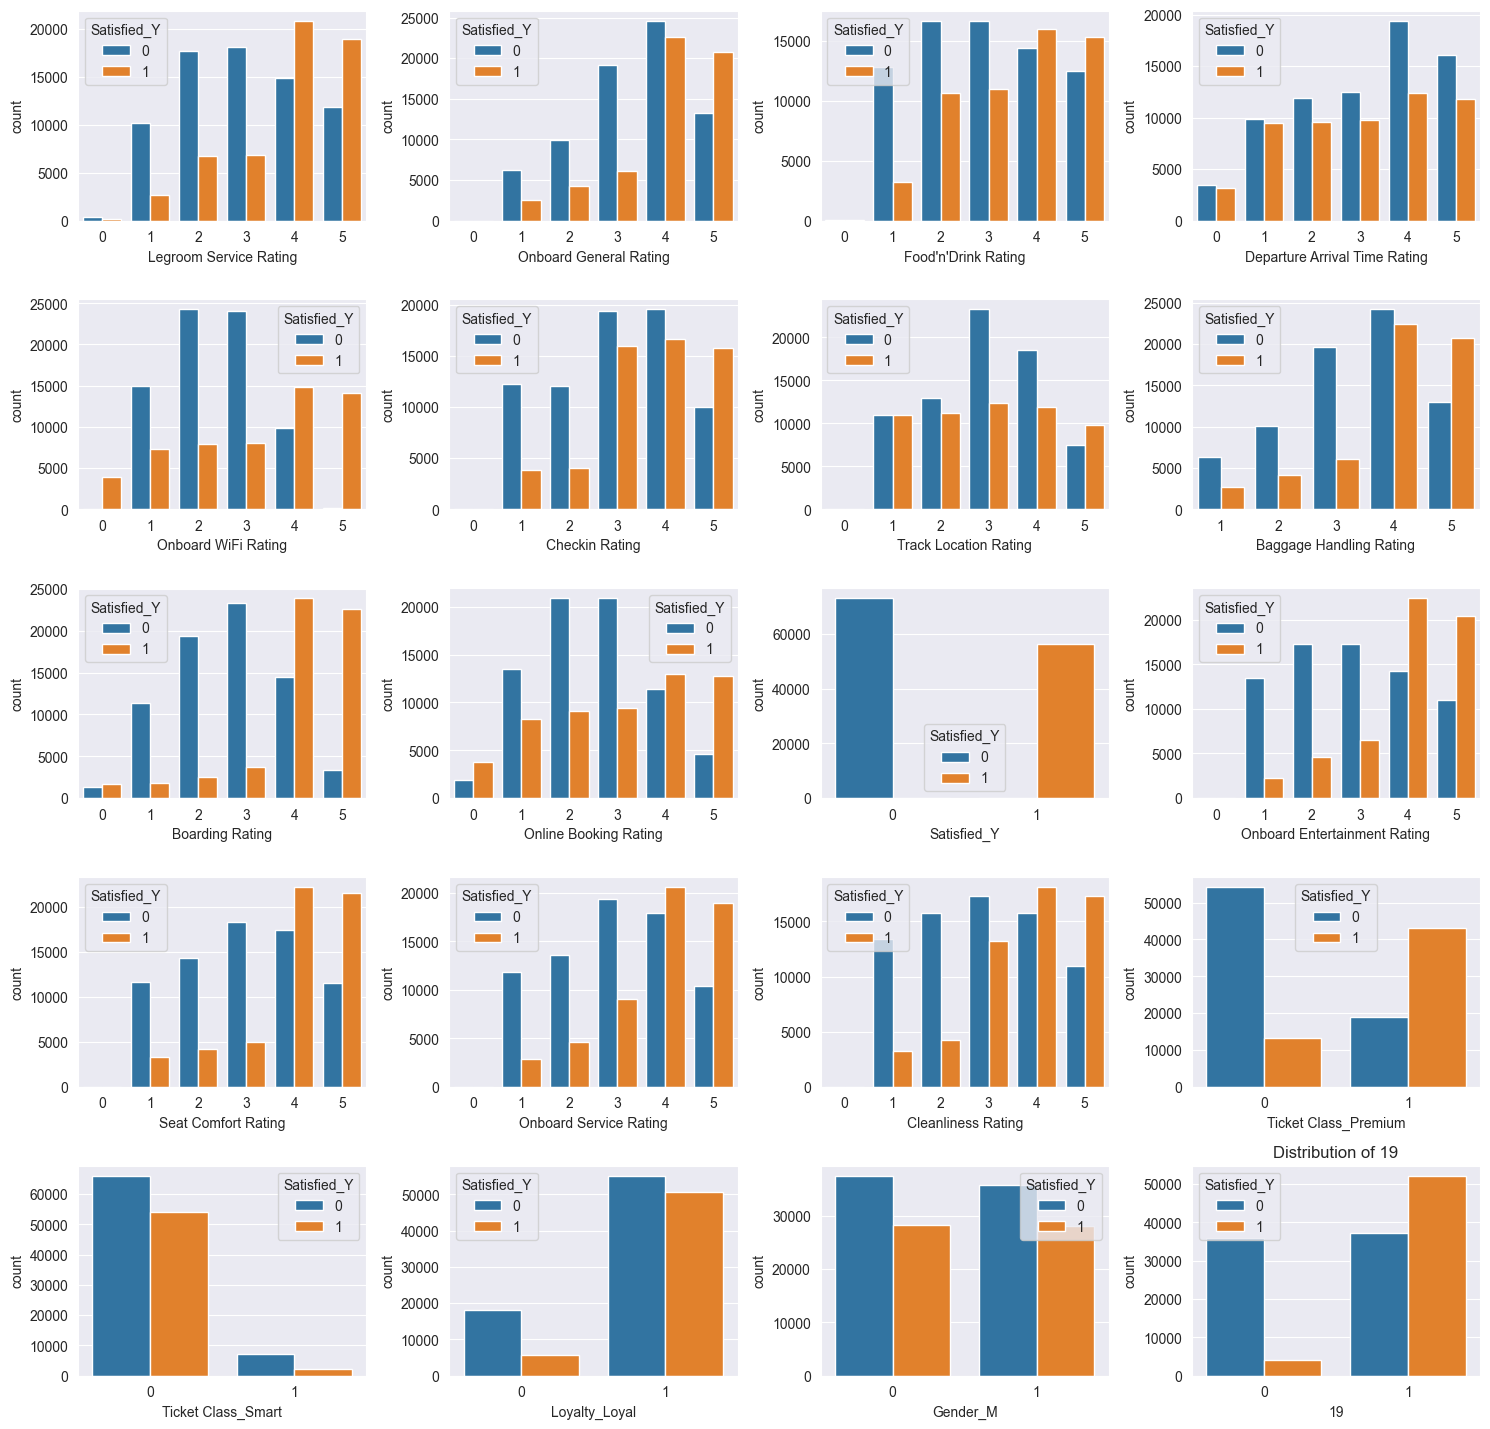

In [347]:
# Plot Categorical Variables

fig, axes = plt.subplots(5, 4, figsize=(15, 15))

for i,column in enumerate(data_set_cat.columns):
        row = i // 4
        col = i % 4
        sns.countplot(data=data_set_cat, x=column,hue=data_set_cat["Satisfied_Y"].astype(str), ax=axes[row, col])
        plt.title(f"Distribution of {i}")
        plt.xlabel(i)
        plt.ylabel("count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



From these graphs we can see that for ratings as the rating increases the number of satisfied customers usually increases. This trend is particularly strong in "Seat Comfort Rating", "onboard Service Rating","Cleanliness Rating"; but is less apparent in 2 categories, "Track Location Rating" and "Departure Arrival Time Rating", implying that for these 2 the correlation is weaker.

#### CONTINUOUS VARIABLES

For continuos variables like age, distance and delays I used a histplot by grouping intervals of values into bins.

C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

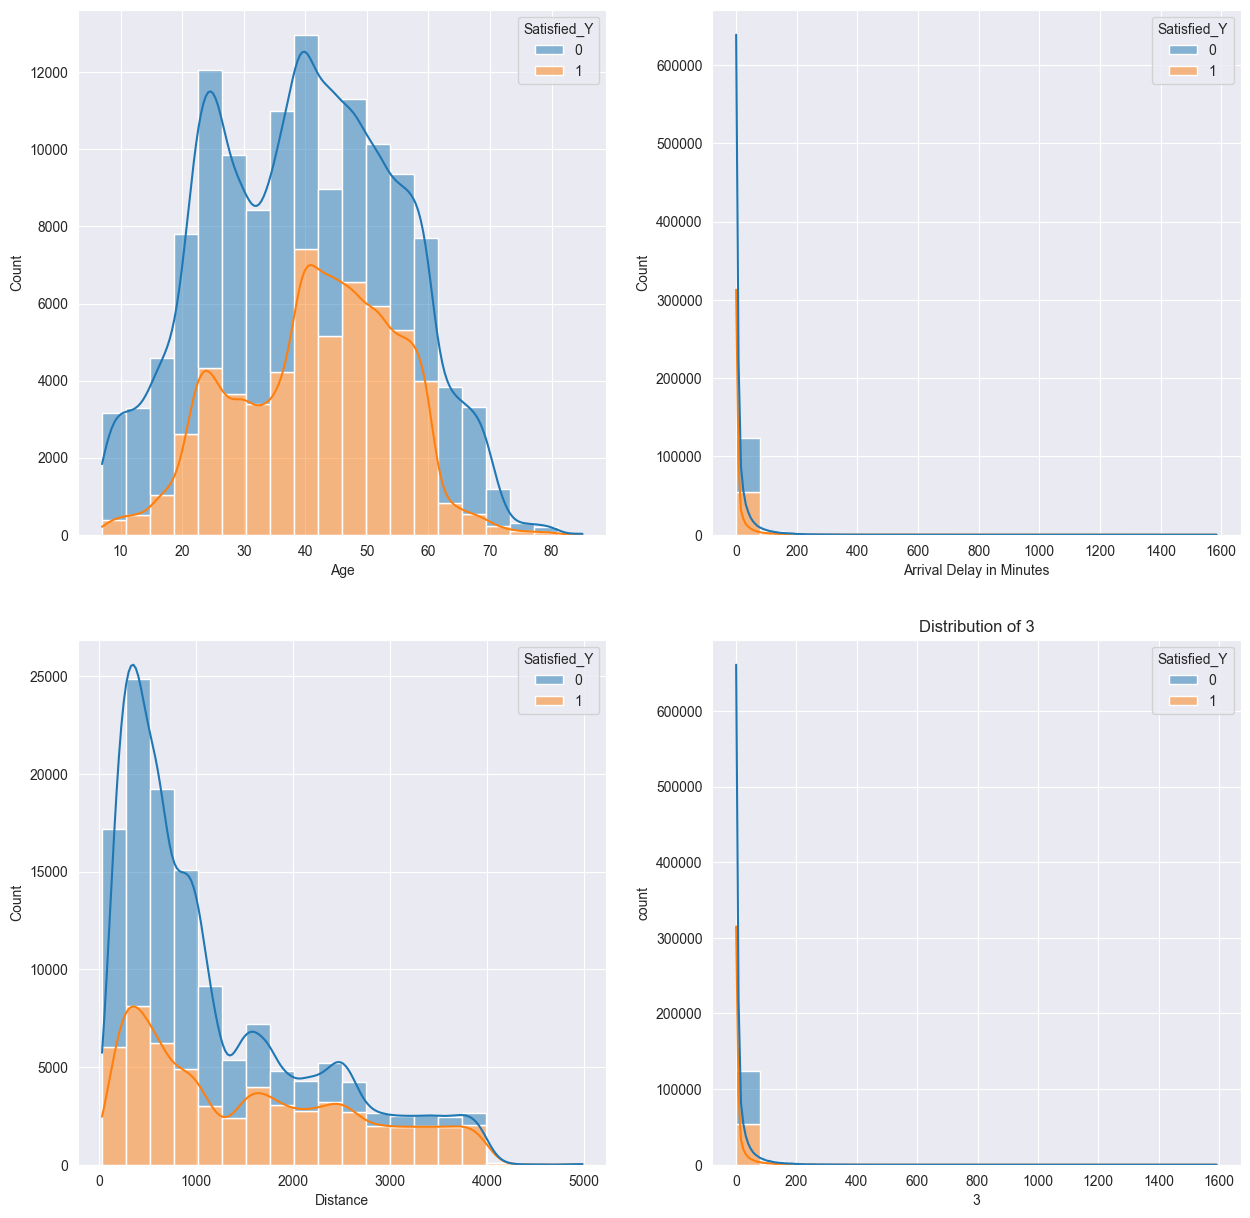

In [348]:
# Plot Continuous Variables

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i,column in enumerate(data_set_con.columns):
        row = i // 2
        col = i % 2
        sns.histplot(data=data_set_con, x=column,bins=20,kde=True,hue=data_set_cat["Satisfied_Y"].astype(str), ax=axes[row, col], multiple="stack")
        plt.title(f"Distribution of {i}")
        plt.xlabel(i)
        plt.ylabel("count")

plt.tight_layout
plt.show()

From these we can see that as distance increases the percentage of satisfied passengers increases.

Moreover, we can also see that delays are both heavily skewed to the right, as such I decided to hot-encode to turn them into a binary categorical value, recording whether a train was late or not.

In [349]:
# Hot Encode

data_set['Departure Delay in Minutes'] = data_set['Departure Delay in Minutes'].apply(lambda x: 0 if x == 0 else 1)

data_set['Arrival Delay in Minutes'] = data_set['Arrival Delay in Minutes'].apply(lambda x: 0 if x == 0 else 1)


C:\Users\admin\AppData\Local\Temp\ipykernel_8956\3311420328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Departure Delay in Minutes'] = data_set['Departure Delay in Minutes'].apply(lambda x: 0 if x == 0 else 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_8956\3311420328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Arrival Delay in Minutes'] = data_set['Arrival Delay in Minutes'].apply(lambda x: 0 if x == 0 else 1)


C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

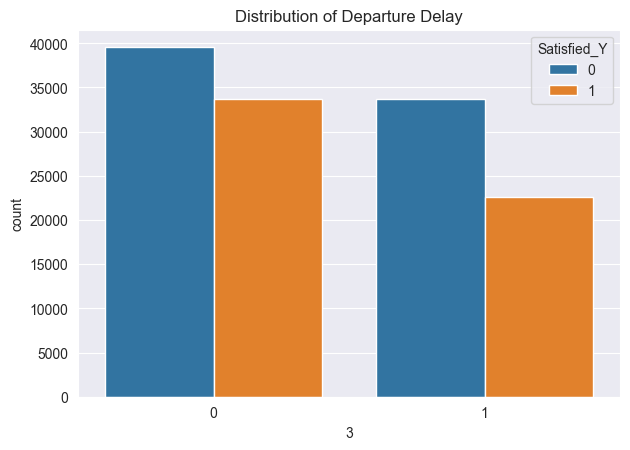

In [350]:
sns.countplot(data=data_set, x=data_set['Departure Delay in Minutes'],hue=data_set_cat["Satisfied_Y"].astype(str), )
plt.title(f"Distribution of Departure Delay")
plt.xlabel(i)
plt.ylabel("count")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

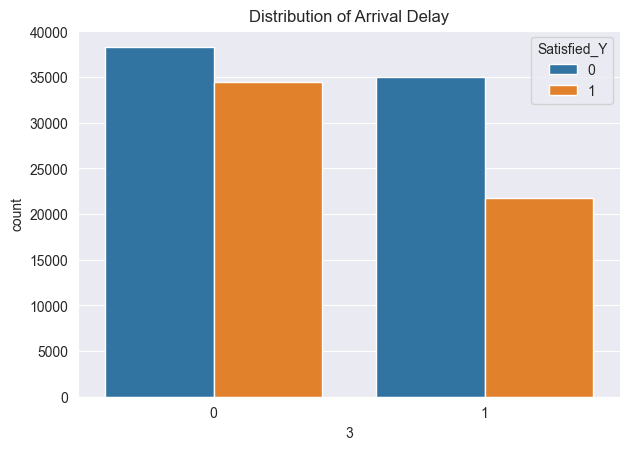

In [351]:
sns.countplot(data=data_set, x=data_set['Arrival Delay in Minutes'],hue=data_set_cat["Satisfied_Y"].astype(str), )
plt.title(f"Distribution of Arrival Delay")
plt.xlabel(i)
plt.ylabel("count")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Generally, whenever there is a delay or not doesn't seem to affect customers satisfaction.

For the date and time I chose to group them by the hour, since the trains all depart during february, so I don't believe there will be much fluctuation by day. But we will check both.

In [352]:

# Extract the hour and day of the month and create a new column for each of them.

data_set["Hour of Day"] = data_set["Date and Time"].dt.hour

data_set["Day"] = data_set["Date and Time"].dt.day

C:\Users\admin\AppData\Local\Temp\ipykernel_8956\2990968285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["Hour of Day"] = data_set["Date and Time"].dt.hour
C:\Users\admin\AppData\Local\Temp\ipykernel_8956\2990968285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["Day"] = data_set["Date and Time"].dt.day


C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='Hour of Day', ylabel='count'>

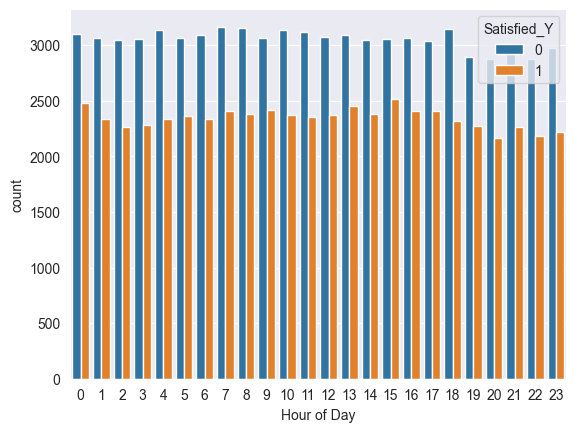

In [353]:

sns.countplot(data=data_set,x="Hour of Day",hue=data_set_cat["Satisfied_Y"].astype(str))

C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='Day', ylabel='count'>

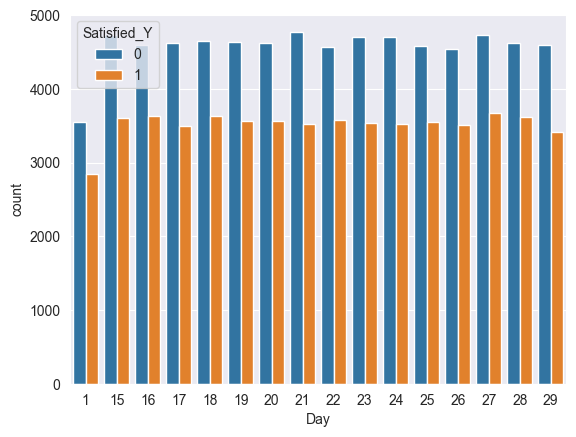

In [354]:

sns.countplot(data=data_set,x="Day",hue=data_set_cat["Satisfied_Y"].astype(str))

Time doesn't seem to affect the y variable as much, since the ratio seems to stay constant throughout the days of february and the 1st of march. Nor does it change significantly in the same day.

### CORRELATION AND MULTICOLLINEARITY

Multicollinearity in data analysis occurs when two or more predictor variables (features) in a regression model are highly correlated. This correlation means that one variable can be linearly predicted from the others with a substantial degree of accuracy. In a way, it’s akin to redundant information being fed into the model. This could lead to redundancy in our models.

As such to mitigate its effects we check for correlated variables and eliminate some of them. We can graphically see their correlation using a heat-map.

<Axes: >

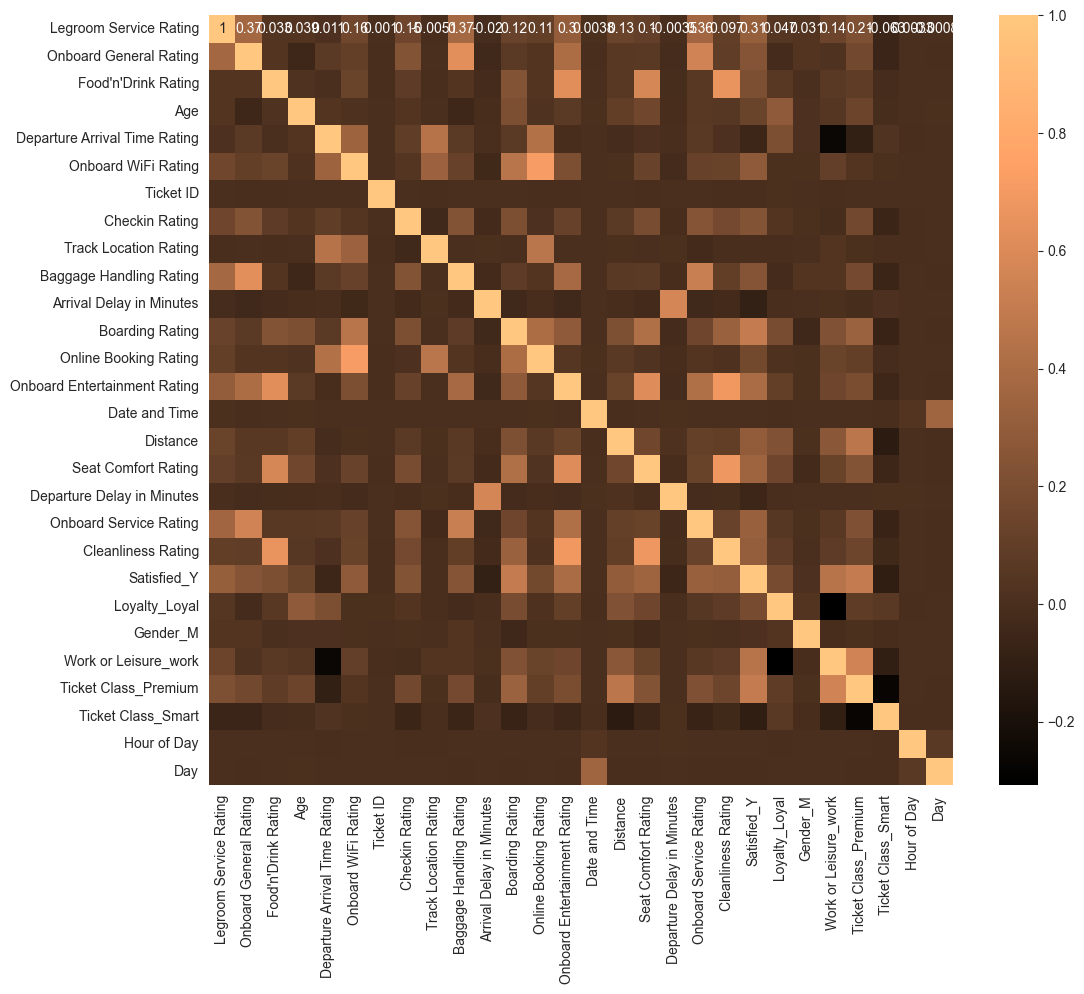

In [355]:
# Plot correlation

plt.figure(figsize=(12, 10))

sns.heatmap(data_set.corr(), annot=True, cmap ='copper')

From the heat-map we can see the correlation between 2 variables by the color of their square, however, since we only want to find the most correlated variables we can just focus on them.

In [356]:
# Find correlations by ordering
top_correlations = data_set.corr().unstack().sort_values(ascending=False).drop_duplicates()
top_inv_correlations = data_set.corr().unstack().sort_values(ascending=True).drop_duplicates()

print(top_correlations.head(10))
print(top_inv_correlations.head(10))

Legroom Service Rating        Legroom Service Rating          1.000000
Online Booking Rating         Onboard WiFi Rating             0.714888
Cleanliness Rating            Onboard Entertainment Rating    0.692491
                              Seat Comfort Rating             0.679657
                              Food'n'Drink Rating             0.658026
Baggage Handling Rating       Onboard General Rating          0.629492
Onboard Entertainment Rating  Food'n'Drink Rating             0.623366
                              Seat Comfort Rating             0.611949
Food'n'Drink Rating           Seat Comfort Rating             0.575993
Arrival Delay in Minutes      Departure Delay in Minutes      0.572046
dtype: float64
Work or Leisure_work           Loyalty_Loyal              -0.308210
Ticket Class_Smart             Ticket Class_Premium       -0.267816
Departure Arrival Time Rating  Work or Leisure_work       -0.257208
Distance                       Ticket Class_Smart         -0.124318
Sat

Our variables show higher positive correlations than negative ones. But I didn't deem them high enough to warrant an erasure. However I noticed that *"Cleanliness Rating","Onboard Entertainment Rating","Seat Comfort Rating"* and *"Food'n'Drink Rating"* were highly correlated with each other.

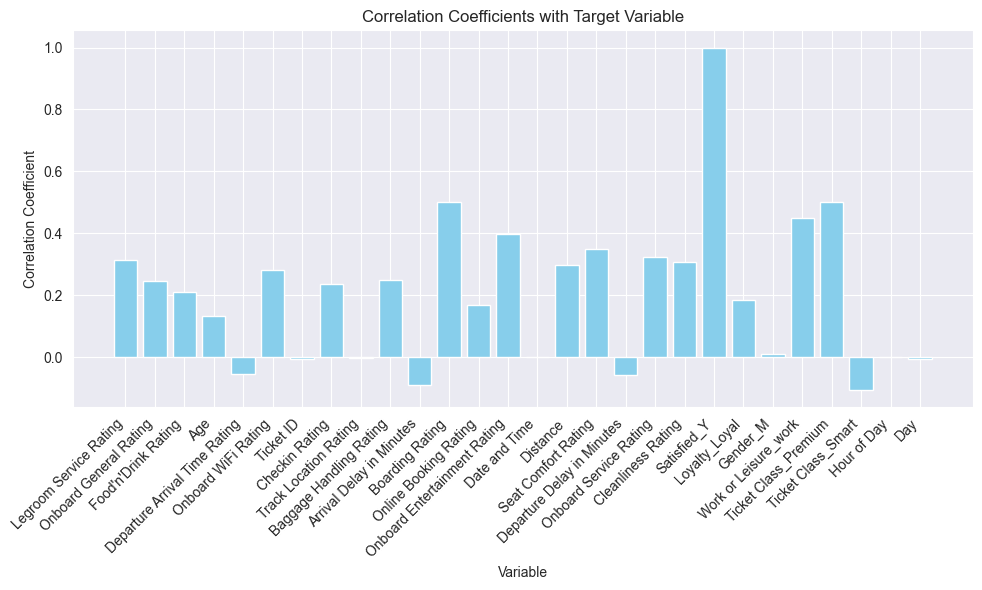

In [357]:
# Correlation of Y Variable with everything else
correlation_df = data_set.corr()[["Satisfied_Y"]]

#Plot the correlation
plt.figure(figsize=(10, 6))
plt.bar(correlation_df.index, correlation_df['Satisfied_Y'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Target Variable')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

Moreover, I also noticed that many variables had a weak relationship with the y-variable, for example as I thought, track location, Date and Tim were especially weak.

---
### OSEMN - 4. Model

In order to build our model we need to split our into our dependent and independent variables, then we have to further divide them into a test and train set.

In [358]:
# Dependent Variable.

y = data_set["Satisfied_Y"]

# Independent Variables.

X = data_set.drop(["Satisfied_Y","Date and Time","Day","Hour of Day"],axis=1)

In [359]:
# Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [360]:
X_train.shape,X_test.shape

((97115, 24), (32372, 24))

We adjust the range of the data so that different features contribute proportionately to the final prediction. StandardScaler, a commonly used technique, plays a key role in this process. It is essential in preparing data for many machine learning models, ensuring that each feature contributes equally to the outcome and improving the efficiency of optimization algorithms.

In [361]:
# We standardize our Datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### MODEL 1. LOGISTIC REGRESSION

In [362]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred_log = classifier.predict(X_test_scaled)


[[16552  1754]
 [ 2268 11798]]
Accuracy = 0.8757568268874336
Precision = 0.8705726092089728
Recall = 0.8387601308118868
F1 Score = 0.8543703381852416
AUC Score: 0.871472275610248


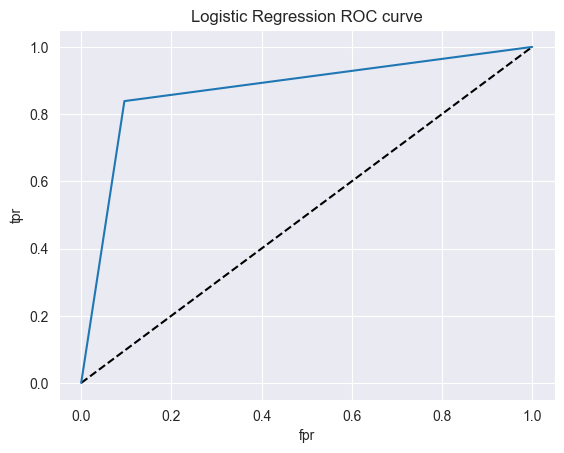

In [363]:
performance(y_test,y_pred_log)

#### MODEL 2. KNN NEIGHBOURS

In [280]:
# BIC Feature Selection
k_best_selector_bic = SelectKBest(score_func=f_classif, k=5)  # Adjust k as needed
X_train_selected_bic = k_best_selector_bic.fit_transform(X_train_scaled, y_train)
X_test_selected_bic = k_best_selector_bic.transform(X_test_scaled)

# KNN classifier
knn_model = KNeighborsClassifier()

# Parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(2, 51,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
# GridSearchCV with BIC-selected data
grid_search_bic = GridSearchCV(knn_model, param_grid, cv=5)
grid_search_bic.fit(X_train_selected_bic, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

[[17014  1292]
 [ 2438 11628]]
Accuracy = 0.8847769677499073
Precision = 0.9
Recall = 0.8266742499644533
F1 Score = 0.8617801823167569
AUC Score: 0.871472275610248


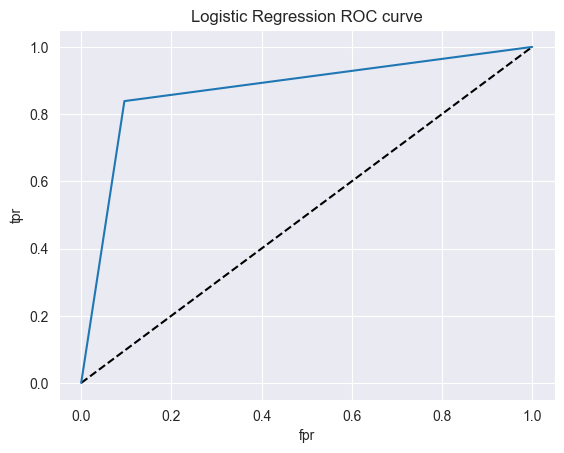

In [322]:

y_pred_bic = grid_search_bic.predict(X_test_selected_bic)

performance(y_test,y_pred_bic)

#### MODEL 3. XGBOOST

In [0]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xg = xgb_model.predict(X_test_scaled)

[[17904   402]
 [  815 13251]]
Accuracy = 0.9624057827752378
Precision = 0.9705559217754339
Recall = 0.9420588653490687
F1 Score = 0.9560950972257297
AUC Score: 0.871472275610248


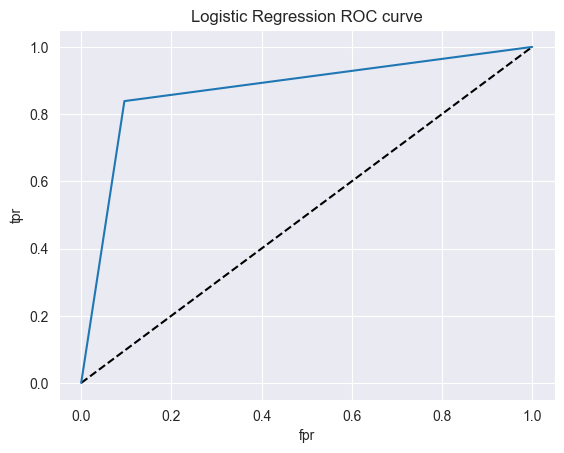

In [321]:

# Evaluate the model's performance
performance(y_test,y_pred_xg)

---
### OSEMN - 5. Interpret


  Parameters  y_pred_xg  y_pred_log  y_pred_bic
0   Accuracy   0.962406    0.875757    0.884777
1  Precision   0.970556    0.870573    0.900000
2     Recall   0.942059    0.838760    0.826674
3   F1_Score   0.956095    0.854370    0.861780
4  AUC_Score   0.960049    0.871472    0.878048


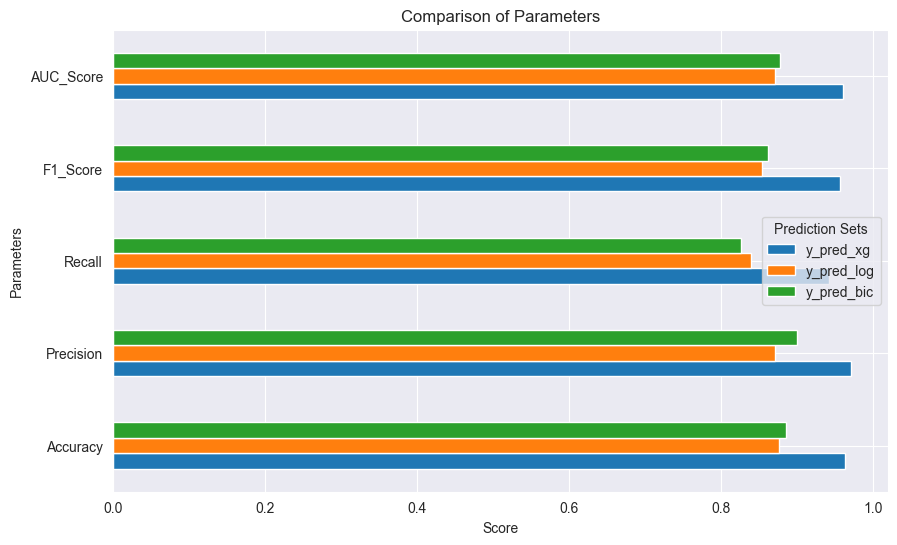

In [384]:

lis=[("y_pred_xg",y_pred_xg),("y_pred_log",y_pred_log),("y_pred_bic",y_pred_bic)]
comparison(*lis)


The parameters I chose to use to assess the fitness and accuracy of our model were:

**Accuracy**: The proportion of correctly classified instances out of the total instances.

**Precision**: The ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions.

**Recall**: The ratio of true positive predictions to the total actual positives. It measures the ability of the model to capture all relevant instances.

**F1 Score**: The harmonic mean of precision and recall. It provides a balance between precision and recall. The 'F1_Score' row shows the F1 scores for each model.

**AUC Score (Area Under the ROC Curve)**: It evaluates the trade-off between true positive rate and false positive rate.

In all cases the XG Boost model far outperforms the other models, consistently scoring more than 95%. As such our model is pretty good at differentiating the customer base based on the information provided.

As such I looked more into our XG Boost model to find the most relevant features.

C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Desktop\luiss\ai\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


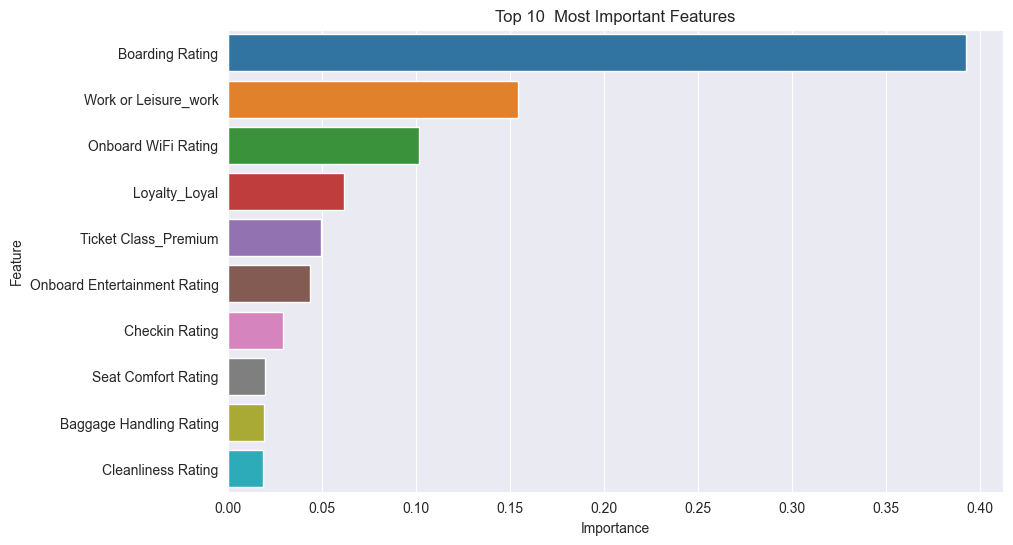

In [386]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10  Most Important Features')
plt.show()

From this we can see that the start of the journey will greatly affect how we perceive the rest of it, since Boarding Rating had the highest Importance. Therefore if I were to suggest improvements on the services offered by the train firm, I would suggest to focus them on improving the boarding experience.